In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

## Plotting the audio file's waveform and its spectrogram

## Angry

In [104]:
#angry
df = pd.DataFrame(columns=['feature'])
data, sample_rate = librosa.load('data/1_1.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature1 = mfccs
feature1 = np.array(feature1)
feature1 = np.array([abs(feature1[i]) for i in range(len(feature1) - 1)])
df.loc[0] = [feature1]

data, sample_rate = librosa.load('data/1_100.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature2 = mfccs
feature2 = np.array(feature2)
feature2 = np.array([abs(feature2[i]) for i in range(len(feature2) - 1)])
df.loc[1] = [feature2]


data, sample_rate = librosa.load('data/1_200.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature3 = mfccs
feature3 = np.array(feature3)
feature3 = np.array([abs(feature3[i]) for i in range(len(feature3) - 1)])
df.loc[2] = [feature3]


data, sample_rate = librosa.load('data/1_300.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature4 = mfccs
feature4 = np.array(feature4)
feature4 = np.array([abs(feature4[i]) for i in range(len(feature4) - 1)])
df.loc[3] = [feature4]

df = pd.DataFrame(df['feature'].values.tolist())

In [105]:
df = df.fillna(0)

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x1c2fba9710>)

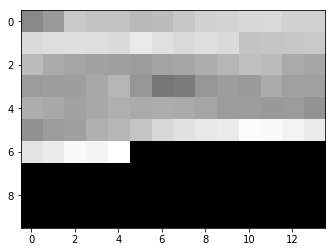

In [106]:
plt,imshow((np.array(df.iloc[0])).reshape(10, 14), cmap="gray")

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x1c2fb5ff60>)

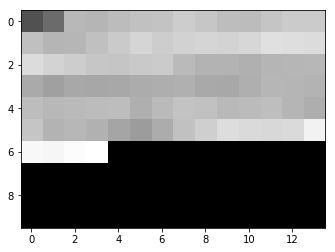

In [107]:
plt,imshow((np.array(df.iloc[1])).reshape(10, 14), cmap="gray")

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x1c2fb65898>)

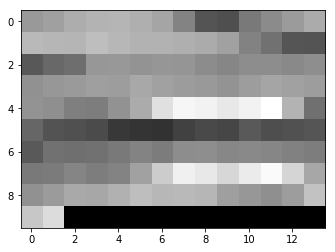

In [108]:
plt,imshow((np.array(df.iloc[2])).reshape(10, 14), cmap="gray")

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x110a69518>)

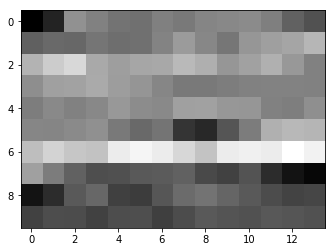

In [109]:
plt,imshow((np.array(df.iloc[3])).reshape(10, 14), cmap="gray")

## fear

In [111]:
#fear
df = pd.DataFrame(columns=['feature'])
data, sample_rate = librosa.load('data/3_1.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature1 = mfccs
feature1 = np.array(feature1)
feature1 = np.array([abs(feature1[i]) for i in range(len(feature1) - 1)])
df.loc[0] = [feature1]

data, sample_rate = librosa.load('data/3_100.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature2 = mfccs
feature2 = np.array(feature2)
feature2 = np.array([abs(feature2[i]) for i in range(len(feature2) - 1)])
df.loc[1] = [feature2]


data, sample_rate = librosa.load('data/3_200.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature3 = mfccs
feature3 = np.array(feature3)
feature3 = np.array([abs(feature3[i]) for i in range(len(feature3) - 1)])
df.loc[2] = [feature3]


data, sample_rate = librosa.load('data/3_300.wav',  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=data, 
                                    sr=sample_rate, 
                                    n_mfcc=13),
                axis=0)
feature4 = mfccs
feature4 = np.array(feature4)
feature4 = np.array([abs(feature4[i]) for i in range(len(feature4) - 1)])
df.loc[3] = [feature4]

df = pd.DataFrame(df['feature'].values.tolist())
df = df.fillna(0)

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x1c30c736a0>)

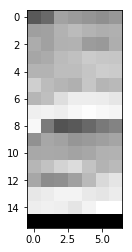

In [112]:
plt,imshow((np.array(df.iloc[0])).reshape(16, 7), cmap="gray")

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x110cd8908>)

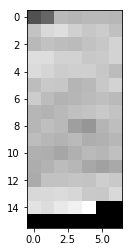

In [113]:
plt,imshow((np.array(df.iloc[1])).reshape(16, 7), cmap="gray")

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x1c30ca2a58>)

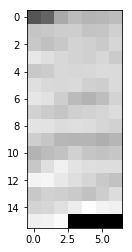

In [114]:
plt,imshow((np.array(df.iloc[2])).reshape(16, 7), cmap="gray")

(<module 'matplotlib.pyplot' from '/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <matplotlib.image.AxesImage at 0x1c31439128>)

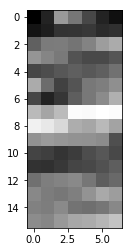

In [115]:
plt,imshow((np.array(df.iloc[3])).reshape(16, 7), cmap="gray")

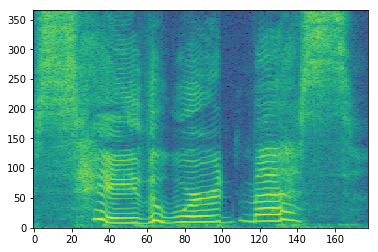

In [116]:

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('data/3_300.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Data extraction

In [117]:
mylist= os.listdir('data/')
len(mylist)

df = pd.DataFrame(columns=['feature'])
labels = pd.DataFrame(columns=['labels'])
bookmark=0
feeling_list = []
del mylist[410]
len(mylist)
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('data/'+y,  res_type='kaiser_fast',duration=2,sr=22050*2, offset = .5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    labels.loc[bookmark] = [int(y[0])]
    bookmark=bookmark+1     

In [122]:

df3 = pd.DataFrame(df['feature'].values.tolist())
print(df3.shape)
label2 = pd.DataFrame(labels['labels'].values.tolist())

(2800, 173)


In [123]:
newdf = pd.concat([df3,label2], axis=1)
newdf = newdf.fillna(0)
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)

In [124]:
from sklearn.model_selection import train_test_split
trainfeatures, testfeatures, trainlabel, testlabel = train_test_split(rnewdf.iloc[:, :-1], rnewdf.iloc[:, -1:],
                                                    stratify=rnewdf.iloc[:, -1:], 
                                                    test_size=0.2)

In [125]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/Users/pktsk/miniconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
X_train.shape

(2240, 173)

## Changing dimension for CNN model

In [127]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [18]:
model = Sequential()

model.add(Conv1D(256, 5, padding='same',
                 input_shape=(173, 1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 173, 256)          1536      
_________________________________________________________________
activation_11 (Activation)   (None, 173, 256)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 173, 128)          163968    
_________________________________________________________________
activation_12 (Activation)   (None, 173, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 173, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 21, 128)           82048     
__________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Train on 2240 samples, validate on 560 samples
Epoch 1/200
2240/2240 [==============================] - 17s - loss: 1.9362 - acc: 0.2790 - val_loss: 1.9116 - val_acc: 0.3393
Epoch 2/200
2240/2240 [==============================] - 17s - loss: 1.8099 - acc: 0.3411 - val_loss: 1.7009 - val_acc: 0.3804
Epoch 3/200
2240/2240 [==============================] - 18s - loss: 1.5317 - acc: 0.4433 - val_loss: 1.4572 - val_acc: 0.4250
Epoch 4/200
2240/2240 [==============================] - 18s - loss: 1.3504 - acc: 0.4879 - val_loss: 1.3430 - val_acc: 0.4964
Epoch 5/200
2240/2240 [==============================] - 18s - loss: 1.2744 - acc: 0.5049 - val_loss: 1.2859 - val_acc: 0.5125
Epoch 6/200
2240/2240 [==============================] - 18s - loss: 1.2292 - acc: 0.5241 - val_loss: 1.2553 - val_acc: 0.5107
Epoch 7/200
2240/2240 [==============================] - 16s - loss: 1.2033 - acc: 0.5411 - val_loss: 1.2366 - val_acc: 0.5321
Epoch 8/200
2240/2240 [==============================] - 16s - l

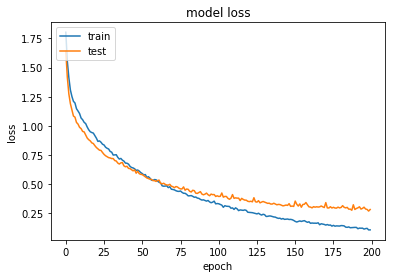

In [30]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

NameError: name 'os' is not defined

In [3]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'model' is not defined

In [16]:
# loading json and creating model
import json
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

KeyError: 0

In [11]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

NameError: name 'loaded_model' is not defined

In [35]:
preds

array([[1.2439590e-05, 9.9957174e-01, 1.7724629e-10, ..., 5.7634346e-09,
        3.5014041e-04, 6.5748281e-05],
       [7.3196371e-03, 6.6226993e-09, 3.3119486e-03, ..., 7.3782029e-04,
        1.8941753e-07, 9.8845416e-01],
       [1.5141332e-04, 1.6924986e-07, 9.9134934e-01, ..., 1.1977904e-06,
        6.1472605e-09, 3.8999169e-05],
       ...,
       [8.4767509e-01, 7.5633864e-09, 1.5167035e-01, ..., 1.4291132e-04,
        1.7725834e-07, 4.7712968e-04],
       [4.6723611e-03, 2.7630952e-08, 9.9474961e-01, ..., 1.0059000e-05,
        5.4174266e-06, 3.6026360e-04],
       [9.0737468e-01, 1.5500322e-06, 9.2246041e-02, ..., 1.8227112e-04,
        1.7483799e-04, 2.0692025e-05]], dtype=float32)

In [36]:
preds1=preds.argmax(axis=1) + 1

In [37]:
preds1

array([2, 7, 3, 7, 5, 4, 5, 1, 7, 3, 7, 6, 5, 2, 3, 6, 4, 5, 6, 2, 6, 4,
       5, 6, 4, 1, 4, 6, 7, 3, 7, 5, 2, 3, 1, 3, 1, 1, 4, 3, 3, 1, 7, 5,
       6, 2, 6, 7, 5, 2, 2, 4, 5, 1, 3, 3, 4, 6, 4, 4, 6, 3, 7, 4, 4, 7,
       3, 5, 2, 6, 7, 7, 7, 2, 2, 2, 4, 4, 3, 6, 2, 7, 2, 1, 5, 1, 1, 6,
       7, 3, 5, 2, 1, 3, 6, 6, 5, 5, 4, 4, 5, 5, 4, 5, 7, 1, 2, 5, 1, 3,
       5, 1, 4, 6, 1, 7, 5, 1, 7, 7, 2, 2, 2, 1, 2, 3, 6, 6, 1, 3, 1, 6,
       4, 5, 2, 5, 6, 7, 3, 2, 4, 2, 1, 7, 5, 5, 7, 6, 1, 5, 1, 4, 7, 6,
       5, 4, 5, 1, 2, 4, 2, 7, 7, 4, 1, 5, 1, 4, 2, 5, 2, 1, 4, 4, 7, 5,
       6, 1, 5, 1, 2, 3, 1, 3, 6, 7, 3, 5, 4, 2, 2, 3, 2, 3, 5, 7, 3, 2,
       7, 2, 2, 1, 3, 3, 1, 7, 3, 6, 6, 2, 3, 6, 5, 7, 4, 2, 6, 1, 5, 7,
       3, 5, 7, 1, 5, 5, 3, 3, 4, 5, 7, 7, 2, 1, 3, 6, 1, 4, 5, 4, 6, 5,
       4, 2, 2, 7, 4, 5, 2, 6, 1, 2, 3, 1, 7, 2, 1, 2, 7, 1, 1, 2, 1, 2,
       2, 4, 7, 1, 3, 4, 2, 5, 5, 4, 6, 3, 3, 1, 7, 5, 2, 5, 3, 7, 7, 5,
       4, 3, 6, 5, 2, 7, 5, 1, 4, 7, 1, 2, 5, 3, 6,

In [38]:
abc = preds1.astype(int).flatten()
abc

array([2, 7, 3, 7, 5, 4, 5, 1, 7, 3, 7, 6, 5, 2, 3, 6, 4, 5, 6, 2, 6, 4,
       5, 6, 4, 1, 4, 6, 7, 3, 7, 5, 2, 3, 1, 3, 1, 1, 4, 3, 3, 1, 7, 5,
       6, 2, 6, 7, 5, 2, 2, 4, 5, 1, 3, 3, 4, 6, 4, 4, 6, 3, 7, 4, 4, 7,
       3, 5, 2, 6, 7, 7, 7, 2, 2, 2, 4, 4, 3, 6, 2, 7, 2, 1, 5, 1, 1, 6,
       7, 3, 5, 2, 1, 3, 6, 6, 5, 5, 4, 4, 5, 5, 4, 5, 7, 1, 2, 5, 1, 3,
       5, 1, 4, 6, 1, 7, 5, 1, 7, 7, 2, 2, 2, 1, 2, 3, 6, 6, 1, 3, 1, 6,
       4, 5, 2, 5, 6, 7, 3, 2, 4, 2, 1, 7, 5, 5, 7, 6, 1, 5, 1, 4, 7, 6,
       5, 4, 5, 1, 2, 4, 2, 7, 7, 4, 1, 5, 1, 4, 2, 5, 2, 1, 4, 4, 7, 5,
       6, 1, 5, 1, 2, 3, 1, 3, 6, 7, 3, 5, 4, 2, 2, 3, 2, 3, 5, 7, 3, 2,
       7, 2, 2, 1, 3, 3, 1, 7, 3, 6, 6, 2, 3, 6, 5, 7, 4, 2, 6, 1, 5, 7,
       3, 5, 7, 1, 5, 5, 3, 3, 4, 5, 7, 7, 2, 1, 3, 6, 1, 4, 5, 4, 6, 5,
       4, 2, 2, 7, 4, 5, 2, 6, 1, 2, 3, 1, 7, 2, 1, 2, 7, 1, 1, 2, 1, 2,
       2, 4, 7, 1, 3, 4, 2, 5, 5, 4, 6, 3, 3, 1, 7, 5, 2, 5, 3, 7, 7, 5,
       4, 3, 6, 5, 2, 7, 5, 1, 4, 7, 1, 2, 5, 3, 6,

In [39]:
actual=y_test.argmax(axis=1) + 1

In [40]:
actual

array([2, 7, 3, 7, 5, 4, 5, 1, 7, 3, 7, 6, 5, 2, 3, 6, 4, 5, 6, 2, 7, 7,
       5, 6, 4, 3, 4, 6, 7, 3, 7, 5, 2, 3, 3, 3, 1, 2, 4, 3, 3, 1, 2, 5,
       6, 2, 6, 7, 5, 2, 6, 4, 5, 1, 3, 3, 4, 6, 4, 4, 6, 3, 7, 4, 4, 7,
       3, 5, 2, 6, 7, 7, 7, 2, 2, 2, 4, 4, 1, 6, 2, 7, 2, 1, 5, 1, 1, 6,
       7, 3, 1, 2, 1, 7, 6, 6, 5, 5, 4, 4, 5, 5, 4, 5, 7, 1, 2, 2, 1, 3,
       5, 1, 4, 6, 6, 7, 5, 1, 7, 7, 2, 2, 6, 1, 2, 1, 6, 6, 1, 3, 1, 6,
       4, 5, 2, 5, 6, 7, 3, 2, 4, 2, 1, 7, 5, 5, 7, 6, 1, 5, 1, 4, 7, 6,
       5, 4, 5, 1, 2, 3, 2, 3, 7, 4, 1, 5, 3, 4, 2, 5, 2, 3, 4, 4, 7, 5,
       6, 1, 5, 1, 2, 3, 1, 3, 6, 7, 3, 5, 4, 2, 6, 3, 2, 3, 5, 7, 3, 2,
       7, 2, 2, 1, 3, 3, 1, 7, 3, 6, 6, 2, 1, 6, 5, 7, 4, 2, 6, 7, 5, 7,
       3, 5, 7, 1, 5, 5, 3, 3, 4, 5, 3, 7, 2, 1, 3, 6, 3, 4, 5, 4, 6, 5,
       4, 2, 2, 7, 4, 5, 2, 6, 1, 2, 3, 1, 7, 2, 1, 2, 7, 1, 1, 2, 5, 2,
       7, 4, 7, 1, 3, 4, 2, 4, 5, 4, 6, 7, 4, 1, 7, 5, 2, 5, 3, 7, 7, 5,
       4, 3, 2, 5, 2, 7, 5, 3, 4, 7, 1, 2, 5, 3, 6,

In [41]:
predictions = (lb.inverse_transform((abc)))

ValueError: y contains previously unseen labels: [7]

## live demo

In [56]:
data, sampling_rate = librosa.load('data/2_1.wav')

Populating the interactive namespace from numpy and matplotlib


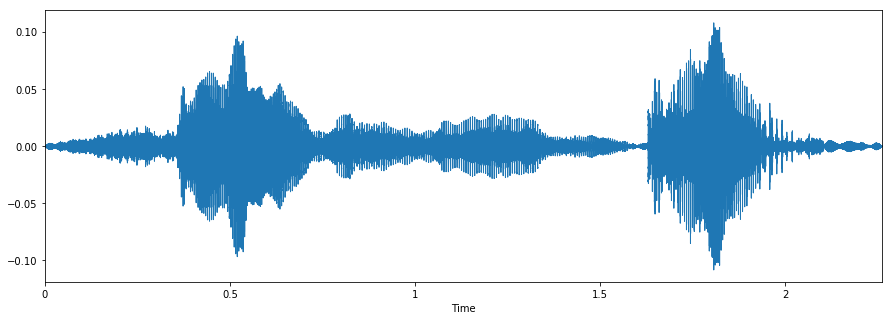

In [57]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [275]:
X, sample_rate = librosa.load('output6.wav', res_type='kaiser_fast',duration=2,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive
print(livedf2.shape)
result = np.zeros((173, 1))

(129,)


In [276]:
livedf2.shape[0]

129

In [277]:
# result.shape
livedf2.shape
livedf2 = livedf2.reshape((livedf2.shape[0], 1))

In [278]:
result[:livedf2.shape[0],:livedf2.shape[1]] = livedf2

In [279]:
result= pd.DataFrame(data=result)

In [280]:
result = result.stack().to_frame().T

In [281]:
result

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-19.018922,-19.633565,-24.567061,-25.23261,-25.566915,-26.531978,-25.491727,-26.85103,-28.513885,-28.811535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
twodim= np.expand_dims(result, axis=2)

In [283]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 7ms/step


In [284]:
livepreds

array([[1.0551734e-02, 4.6024696e-04, 2.7426831e-02, 1.6503824e-02,
        1.5646853e-01, 8.0191479e-05, 7.8850871e-01]], dtype=float32)

In [285]:
livepreds1=livepreds.argmax(axis=1) + 1

In [286]:
print(livepreds1)

[7]
